<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [155]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['BreastCancerDataset.csv']), header = 0)

Saving BreastCancerDataset.csv to BreastCancerDataset (2).csv


# In this section we prep the data and remove columns

In [156]:
# Show dataset
# split data into training and test datasets
trainingSet = df[0:285]
testSet = df[284:570]

# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)


In [157]:
trainingSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [158]:
testSet.head()


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
284,B,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,0.1432,0.05935,0.2913,1.389,2.347,23.29,0.006418,0.039610,0.07927,0.017740,0.01878,0.003696,13.90,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127
285,B,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.350,1.721,22.45,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
286,B,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,0.1588,0.06766,0.2742,1.390,3.198,21.91,0.006719,0.051560,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.115500,0.2465,0.09981
287,B,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.053660,0.2309,0.06915
288,B,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.082620,0.08099,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.093140,0.2955,0.07009


In [159]:
testSet.values

array([['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127],
       ['B', 12.58, 18.4, ..., 0.008772, 0.2505, 0.06431],
       ['B', 11.94, 20.76, ..., 0.1155, 0.2465, 0.09981],
       ...,
       ['M', 16.6, 28.08, ..., 0.1418, 0.2218, 0.0782],
       ['M', 20.6, 29.33, ..., 0.265, 0.4087, 0.124],
       ['B', 7.76, 24.54, ..., 0.0, 0.2871, 0.07039]], dtype=object)

In [160]:
trainingSet.values

array([['M', 17.99, 10.38, ..., 0.2654, 0.4601, 0.1189],
       ['M', 20.57, 17.77, ..., 0.18600000000000003, 0.275, 0.08902],
       ['M', 19.69, 21.25, ..., 0.243, 0.3613, 0.08757999999999999],
       ...,
       ['M', 19.4, 18.18, ..., 0.2252, 0.359, 0.07787000000000001],
       ['M', 16.24, 18.77, ..., 0.1732, 0.27699999999999997, 0.1063],
       ['B', 12.89, 15.7, ..., 0.1017, 0.1999, 0.07127]], dtype=object)

In [161]:
testSet.shape

(285, 31)

In [162]:
trainingSet.shape

(285, 31)

In [163]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})

In [164]:
# Show correlation of our training set
trainingSet.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.703449,0.486942,0.716005,0.667300,0.318325,0.574792,0.621349,0.732803,0.302973,-0.008718,0.503796,-0.045864,0.496016,0.504368,-0.096346,0.276400,0.158485,0.339639,-0.033545,0.048153,0.757922,0.512686,0.765805,0.706237,0.414696,0.585880,0.612934,0.782665,0.421020,0.339240
Mean_Radius,0.703449,1.000000,0.417110,0.997409,0.987874,0.095479,0.481166,0.626009,0.796613,0.139182,-0.320128,0.677708,-0.047038,0.673946,0.748113,-0.166819,0.209612,0.131976,0.326857,-0.063399,-0.045565,0.960571,0.359048,0.956918,0.936653,0.062589,0.374827,0.465053,0.705876,0.127339,-0.012924
Mean_Texture,0.486942,0.417110,1.000000,0.422011,0.401086,-0.004543,0.290733,0.319214,0.342773,0.061334,-0.072598,0.254753,0.268767,0.260600,0.260669,-0.090136,0.190741,0.097355,0.142918,-0.073272,0.029390,0.453687,0.910238,0.454334,0.438724,0.126935,0.343455,0.333414,0.365864,0.138717,0.171297
Mean_Perimeter,0.716005,0.997409,0.422011,1.000000,0.986143,0.138138,0.537948,0.670356,0.829973,0.178659,-0.264251,0.692206,-0.031593,0.695527,0.758395,-0.145430,0.257822,0.164747,0.359235,-0.035609,-0.007039,0.960056,0.364686,0.962578,0.935911,0.096601,0.420113,0.504067,0.735540,0.155737,0.032115
Mean_Area,0.667300,0.987874,0.401086,0.986143,1.000000,0.102347,0.466787,0.631569,0.790651,0.129189,-0.294978,0.719253,-0.016938,0.714389,0.800368,-0.112895,0.213523,0.150140,0.318383,-0.030300,-0.020998,0.946245,0.336771,0.942686,0.943718,0.062505,0.343586,0.447093,0.674255,0.096912,-0.022034
Mean_Smoothness,0.318325,0.095479,-0.004543,0.138138,0.102347,1.000000,0.640152,0.527947,0.549464,0.574677,0.602301,0.285527,0.091694,0.277074,0.232565,0.344254,0.362040,0.226319,0.323970,0.247537,0.307846,0.143708,0.044997,0.175042,0.135849,0.769081,0.476184,0.425674,0.473136,0.408030,0.504941
Mean_Compactness,0.574792,0.481166,0.290733,0.537948,0.466787,0.640152,1.000000,0.881751,0.837869,0.621605,0.579727,0.499361,0.108377,0.547195,0.461337,0.134573,0.750285,0.499371,0.594317,0.295790,0.496107,0.515847,0.293495,0.574490,0.485591,0.530631,0.859221,0.796469,0.806787,0.536170,0.671468
Mean_Concavity,0.621349,0.626009,0.319214,0.670356,0.631569,0.527947,0.881751,1.000000,0.905394,0.523149,0.400231,0.623405,0.141902,0.637248,0.607512,0.152017,0.697010,0.673898,0.662218,0.253360,0.493662,0.633450,0.300559,0.676377,0.617754,0.431627,0.723446,0.863087,0.828574,0.414380,0.513112
Mean_Concave_Points,0.732803,0.796613,0.342773,0.829973,0.790651,0.549464,0.837869,0.905394,1.000000,0.489340,0.198202,0.692318,0.059589,0.701788,0.694843,0.064230,0.506820,0.375297,0.568949,0.147535,0.264834,0.801840,0.316525,0.832186,0.777648,0.432051,0.653525,0.716531,0.894075,0.375089,0.364433
Mean_Symmetry,0.302973,0.139182,0.061334,0.178659,0.129189,0.574677,0.621605,0.523149,0.489340,1.000000,0.497764,0.304270,0.147937,0.308344,0.223600,0.091427,0.428477,0.316322,0.364011,0.490980,0.341827,0.178867,0.093464,0.217316,0.157677,0.401858,0.487624,0.447862,0.454155,0.707725,0.442162


# Training the linear regression model

## We also make predictions for trainingset and testset


r^2 value:  1.0
Prediction:  [1. 1. 1. 1. 1.]


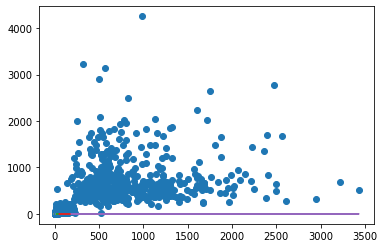

In [168]:
# Here we train a model to perform linear regression data set to predict 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

y = trainingSet.Diagnosis

# create the linear regression model by fitting training set to the test set
regression_model = LinearRegression().fit(trainingSet, y)
# Score the model and retrive r^2 value
rSquared = regression_model.score(trainingSet, y)
print('r^2 value: ', rSquared)
print('Prediction: ', regression_model.predict(trainingSet.head()))
#Show a scatter plot of training set and 
plt.scatter(trainingSet,testSet)
plt.plot(trainingSet,regression_model.predict(trainingSet))

In [171]:

y = testSet.Diagnosis

regression_model = LinearRegression().fit(testSet, y)

print('Prediction: ', regression_model.predict(testSet.head()))

testSet.head()

Prediction:  [-5.44544861e-14 -5.66793841e-16 -2.47188422e-14 -4.26345648e-14
  1.46635185e-13]


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
284,0,12.89,15.70,84.08,516.6,0.07818,0.09580,0.11150,0.033900,0.1432,0.05935,0.2913,1.389,2.347,23.29,0.006418,0.039610,0.07927,0.017740,0.01878,0.003696,13.90,19.69,92.12,595.6,0.09926,0.23170,0.334400,0.101700,0.1999,0.07127
285,0,12.58,18.40,79.83,489.0,0.08393,0.04216,0.00186,0.002924,0.1697,0.05855,0.2719,1.350,1.721,22.45,0.006383,0.008008,0.00186,0.002924,0.02571,0.002015,13.50,23.08,85.56,564.1,0.10380,0.06624,0.005579,0.008772,0.2505,0.06431
286,0,11.94,20.76,77.87,441.0,0.08605,0.10110,0.06574,0.037910,0.1588,0.06766,0.2742,1.390,3.198,21.91,0.006719,0.051560,0.04387,0.016330,0.01872,0.008015,13.24,27.29,92.20,546.1,0.11160,0.28130,0.236500,0.115500,0.2465,0.09981
287,0,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.011710,0.1337,0.05581,0.1532,0.469,1.115,12.68,0.004731,0.013450,0.01652,0.005905,0.01619,0.002081,13.62,15.54,87.40,577.0,0.09616,0.11470,0.118600,0.053660,0.2309,0.06915
288,0,11.26,19.96,73.72,394.1,0.08020,0.11810,0.09274,0.055880,0.2595,0.06233,0.4866,1.905,2.877,34.68,0.015740,0.082620,0.08099,0.034870,0.03418,0.006517,11.86,22.33,78.27,437.6,0.10280,0.18430,0.154600,0.093140,0.2955,0.07009


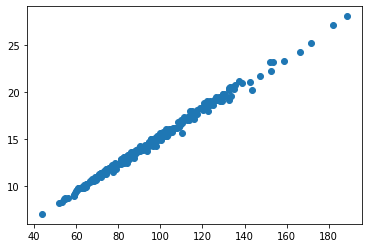

In [172]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


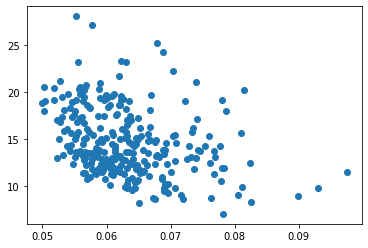

In [173]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


In [174]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  1.0
mean squared errors value:  13.505677226287288


# Random Forest

Here we use random forest algorithm on the data using a random forest regressor

MultiOutputRegressor(estimator=RandomForestRegressor(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     criterion='mse',
                                                     max_depth=24,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                

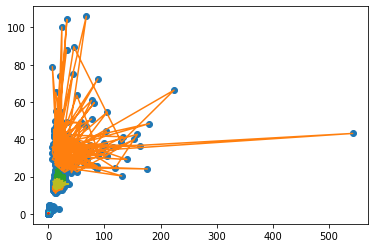

In [175]:
#import packages from sklearn
# referencing sklearn docs: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputRegressor

# here we define the multiple output regressor

multi_output_regressor_rf = MultiOutputRegressor((RandomForestRegressor(n_estimators=100,
                                                          max_depth=24,

                                                          random_state=0)))
                                                          
# fit the model and make predictions on the test set
multi_output_regressor_rf.fit(trainingSet,testSet)
print(multi_output_regressor_rf)
testSetPred = multi_output_regressor_rf.predict(testSet)
plt.scatter(testSet,testSetPred)
# As we can see from this plot the model predicts the testSet very well
plt.plot(testSet,testSetPred)


In [176]:
print('R squared value: ',multi_output_regressor_rf.score(trainingSet,testSet))

R squared value:  0.8395450155017796


In [178]:
testSetPred = multi_output_regressor_rf.predict(trainingSet.head())
print(testSetPred)

[[4.00000000e-02 1.33429500e+01 1.74473000e+01 8.21816367e-02
  9.08148929e-02 1.03657253e-01 1.53591000e-01 6.00843180e-02
  3.20019000e-01 1.40669900e+00 2.49299000e+00 2.87385000e+01
  6.66457213e-03 3.60463217e-02 6.39260133e-02 1.60354450e-02
  2.03464934e-02 3.77923011e-03 1.45481000e+01 1.06140022e-01
  2.14910500e-01 2.84573310e-01 1.04437257e-01 2.22457333e-01]
 [9.00000000e-02 1.31463000e+01 1.89332000e+01 8.87420781e-02
  5.82889967e-02 3.45949784e-02 1.72426467e-01 6.06301817e-02
  4.04099333e-01 1.28129500e+00 2.31740700e+00 3.20138000e+01
  6.89536872e-03 1.84323124e-02 1.22440749e-02 7.34792374e-03
  2.45387879e-02 3.29232792e-03 1.46017600e+01 1.11273967e-01
  1.20878600e-01 7.77585436e-02 4.67206000e-02 2.53490000e-01]
 [1.00000000e-01 1.25631400e+01 2.01591000e+01 8.96913524e-02
  9.97637542e-02 7.13588950e-02 1.64939850e-01 6.58385076e-02
  2.71478633e-01 1.32456900e+00 2.97320000e+00 2.58586000e+01
  6.97394668e-03 4.53592483e-02 4.49357026e-02 1.55125612e-02
  1.95